In [505]:
# Annual Population Change 1993-2023 Last 30 years ın Ireland
# Annual Population Change being specifectly immigration and emigration 2019-2023 After Bretix 
# Annual Population Change being specifectly annual deaths/annual births during corona time 
# Annual Population Change being specifectly annual deaths/annual births during corona time 

In [506]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [507]:
data=pd.read_csv('PEA15.20231021T091018.csv')

In [508]:
data

,STATISTIC Label,Year,Component,UNIT,VALUE
0,Annual Population Change,1993,Annual births,Thousand,50.4
1,Annual Population Change,1993,Annual deaths,Thousand,30.4
2,Annual Population Change,1993,Natural increase,Thousand,20.0
3,Annual Population Change,1993,Immigrants,Thousand,34.7
4,Annual Population Change,1993,Emigrants,Thousand,35.1
...,...,...,...,...,...
243,Annual Population Change,2023,Immigrants,Thousand,141.6
244,Annual Population Change,2023,Emigrants,Thousand,64.0
245,Annual Population Change,2023,Net migration,Thousand,77.6
246,Annual Population Change,2023,Population change,Thousand,97.6


In [509]:
data.head(10)

,STATISTIC Label,Year,Component,UNIT,VALUE
0,Annual Population Change,1993,Annual births,Thousand,50.4
1,Annual Population Change,1993,Annual deaths,Thousand,30.4
2,Annual Population Change,1993,Natural increase,Thousand,20.0
3,Annual Population Change,1993,Immigrants,Thousand,34.7
4,Annual Population Change,1993,Emigrants,Thousand,35.1
5,Annual Population Change,1993,Net migration,Thousand,-0.4
6,Annual Population Change,1993,Population change,Thousand,19.6
7,Annual Population Change,1993,Population,Thousand,3574.1
8,Annual Population Change,1994,Annual births,Thousand,49.1
9,Annual Population Change,1994,Annual deaths,Thousand,32.6


In [510]:
data.head(8) #Why I have chosed just 8 rows cause of different components . We have different components they are displayed 8 rows .

,STATISTIC Label,Year,Component,UNIT,VALUE
0,Annual Population Change,1993,Annual births,Thousand,50.4
1,Annual Population Change,1993,Annual deaths,Thousand,30.4
2,Annual Population Change,1993,Natural increase,Thousand,20.0
3,Annual Population Change,1993,Immigrants,Thousand,34.7
4,Annual Population Change,1993,Emigrants,Thousand,35.1
5,Annual Population Change,1993,Net migration,Thousand,-0.4
6,Annual Population Change,1993,Population change,Thousand,19.6
7,Annual Population Change,1993,Population,Thousand,3574.1


#We can understand now for Year 1993 ; 
Annual births
Annual deaths
Natural increase
Immigrants
Emigrants
Net migration
Population change
Population

I am looking for how changed Ireland population last 30 years and I am gonna predict about next year population ; will they increase or not ? 
If Ireland population is gonna increase , net migraiton or natural increasing will be main reason ? 
Beside that I am gonna have a look , ıf there is increasing for population and it will have continued as before , how will be net migraiton or natural increasing . 
If the government wanna keep population as same as last year and how should be difference for accepting immigrations in 2024 ?  I am gonna have a look answers of this questions .



In [511]:
data.shape #We can have a look data shape . In this data we have 248 rows and 5 columns .

(248, 5)

In [512]:
data.describe() #We can learn how many variables we have and max value or min value or more

,Year,VALUE
count,248.000000,248.000000
mean,2008.000000,582.497581
std,8.962359,1434.688854
min,1993.000000,-27.500000
25%,2000.000000,29.800000
50%,2008.000000,48.350000
75%,2016.000000,73.300000
max,2023.000000,5281.600000


In [513]:
data.describe(include=object) #We can search datas detailly here . As you can see , for example we can understand how many unique or frequency values

,STATISTIC Label,Component,UNIT
count,248,248,248
unique,1,8,1
top,Annual Population Change,Annual births,Thousand
freq,248,31,248


In [514]:
data.info() #We can have an idea about our data . How many floats , integers or objects we have

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  248 non-null    object 
 1   Year             248 non-null    int64  
 2   Component        248 non-null    object 
 3   UNIT             248 non-null    object 
 4   VALUE            248 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 9.8+ KB


After all , before I start I have to be sure there is no missing data . Unless I have any missing data , I can start read data but ıf I have , I should detect them and have to find a solution . Maybe ; 
I can chance them as ' 0' , 
I can take value from another randomly slected sample , 
I can use mean or median , 
I can use interpolate . 

In [515]:
null_filter_i = data.isnull()

In [516]:
null_filter_i.head(10)

,STATISTIC Label,Year,Component,UNIT,VALUE
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [517]:
null_filter_i.shape

(248, 5)

In [518]:
null_filter_i.count() #248 values we have for each groups . There is no missing data 

STATISTIC Label    248
Year               248
Component          248
UNIT               248
VALUE              248
dtype: int64

In [519]:
null_filter_n=data.notnull()

In [520]:
null_filter_n.head(15)

,STATISTIC Label,Year,Component,UNIT,VALUE
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
5,True,True,True,True,True
6,True,True,True,True,True
7,True,True,True,True,True
8,True,True,True,True,True
9,True,True,True,True,True


In [521]:
null_filter_n.shape

(248, 5)

In [522]:
null_filter_n.count() #248 values we have for each groups . There is no missing data 

STATISTIC Label    248
Year               248
Component          248
UNIT               248
VALUE              248
dtype: int64

If we had missing datas , we could have found them as below as separetly having look all columns . 

In [523]:
null_filter_statıstıc = data['STATISTIC Label'].isnull() 
null_filter_statıstıc.head(15)

#We are having look do we have missign datas for Statıstıc Label column or not .

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
Name: STATISTIC Label, dtype: bool

In [524]:
null_filter_statıstıc.shape

(248,)

In [525]:
print(data[null_filter].shape)

#To be plus , we can have a look missing datas shapes and it can say us , ıs there any missing data or not .


(248, 5)


In [526]:
null_filter = data['Year'].isnull()
print(data[null_filter])
print(data[null_filter].shape)

#We are having look if we have missign data for Year column

Empty DataFrame
Columns: [STATISTIC Label, Year, Component, UNIT, VALUE]
Index: []
(0, 5)


In [527]:
null_filter = data['Component'].isnull()
print(data[null_filter])
print(data[null_filter].shape)

#We are having look to see if we have missign data for Component column

Empty DataFrame
Columns: [STATISTIC Label, Year, Component, UNIT, VALUE]
Index: []
(0, 5)


In [528]:
null_filter = data['UNIT'].isnull()
print(data[null_filter])
print(data[null_filter].shape)

#We are having look to see if we have missign data for UNIT column

Empty DataFrame
Columns: [STATISTIC Label, Year, Component, UNIT, VALUE]
Index: []
(0, 5)


In [529]:
null_filter = data['VALUE'].isnull()
print(data[null_filter])
print(data[null_filter].shape)

#We are having look to see if we have missign data for VALUE column

Empty DataFrame
Columns: [STATISTIC Label, Year, Component, UNIT, VALUE]
Index: []
(0, 5)


In [530]:
null_filter = data['STATISTIC Label'].notnull()
print(data[null_filter])
print(data[null_filter].shape)

#We wanna be sure we do not have any missing data with notnull command .

              STATISTIC Label  Year          Component      UNIT   VALUE
0    Annual Population Change  1993      Annual births  Thousand    50.4
1    Annual Population Change  1993      Annual deaths  Thousand    30.4
2    Annual Population Change  1993   Natural increase  Thousand    20.0
3    Annual Population Change  1993         Immigrants  Thousand    34.7
4    Annual Population Change  1993          Emigrants  Thousand    35.1
..                        ...   ...                ...       ...     ...
243  Annual Population Change  2023         Immigrants  Thousand   141.6
244  Annual Population Change  2023          Emigrants  Thousand    64.0
245  Annual Population Change  2023      Net migration  Thousand    77.6
246  Annual Population Change  2023  Population change  Thousand    97.6
247  Annual Population Change  2023         Population  Thousand  5281.6

[248 rows x 5 columns]
(248, 5)


In [531]:
null_filter = data['Year'].notnull()
print(data[null_filter])
print(data[null_filter].shape)

#We wanna be sure we do not have any missing data . We know our data shape ( 248,5) and notnull for Year also same .

              STATISTIC Label  Year          Component      UNIT   VALUE
0    Annual Population Change  1993      Annual births  Thousand    50.4
1    Annual Population Change  1993      Annual deaths  Thousand    30.4
2    Annual Population Change  1993   Natural increase  Thousand    20.0
3    Annual Population Change  1993         Immigrants  Thousand    34.7
4    Annual Population Change  1993          Emigrants  Thousand    35.1
..                        ...   ...                ...       ...     ...
243  Annual Population Change  2023         Immigrants  Thousand   141.6
244  Annual Population Change  2023          Emigrants  Thousand    64.0
245  Annual Population Change  2023      Net migration  Thousand    77.6
246  Annual Population Change  2023  Population change  Thousand    97.6
247  Annual Population Change  2023         Population  Thousand  5281.6

[248 rows x 5 columns]
(248, 5)


In [532]:
null_filter = data.notnull()
print(data[null_filter])
print(data[null_filter].shape)

              STATISTIC Label  Year          Component      UNIT   VALUE
0    Annual Population Change  1993      Annual births  Thousand    50.4
1    Annual Population Change  1993      Annual deaths  Thousand    30.4
2    Annual Population Change  1993   Natural increase  Thousand    20.0
3    Annual Population Change  1993         Immigrants  Thousand    34.7
4    Annual Population Change  1993          Emigrants  Thousand    35.1
..                        ...   ...                ...       ...     ...
243  Annual Population Change  2023         Immigrants  Thousand   141.6
244  Annual Population Change  2023          Emigrants  Thousand    64.0
245  Annual Population Change  2023      Net migration  Thousand    77.6
246  Annual Population Change  2023  Population change  Thousand    97.6
247  Annual Population Change  2023         Population  Thousand  5281.6

[248 rows x 5 columns]
(248, 5)


In [533]:
null_filter.count()

STATISTIC Label    248
Year               248
Component          248
UNIT               248
VALUE              248
dtype: int64

In [534]:
null_filter = data.isnull()
print(data[null_filter])
print(data[null_filter].shape)

    STATISTIC Label  Year Component UNIT  VALUE
0               NaN   NaN       NaN  NaN    NaN
1               NaN   NaN       NaN  NaN    NaN
2               NaN   NaN       NaN  NaN    NaN
3               NaN   NaN       NaN  NaN    NaN
4               NaN   NaN       NaN  NaN    NaN
..              ...   ...       ...  ...    ...
243             NaN   NaN       NaN  NaN    NaN
244             NaN   NaN       NaN  NaN    NaN
245             NaN   NaN       NaN  NaN    NaN
246             NaN   NaN       NaN  NaN    NaN
247             NaN   NaN       NaN  NaN    NaN

[248 rows x 5 columns]
(248, 5)


In [535]:
null_filter.count()

STATISTIC Label    248
Year               248
Component          248
UNIT               248
VALUE              248
dtype: int64

After all controls we are sure we do not have any missing data and we can start to read data for our questions 

In [536]:
data

,STATISTIC Label,Year,Component,UNIT,VALUE
0,Annual Population Change,1993,Annual births,Thousand,50.4
1,Annual Population Change,1993,Annual deaths,Thousand,30.4
2,Annual Population Change,1993,Natural increase,Thousand,20.0
3,Annual Population Change,1993,Immigrants,Thousand,34.7
4,Annual Population Change,1993,Emigrants,Thousand,35.1
...,...,...,...,...,...
243,Annual Population Change,2023,Immigrants,Thousand,141.6
244,Annual Population Change,2023,Emigrants,Thousand,64.0
245,Annual Population Change,2023,Net migration,Thousand,77.6
246,Annual Population Change,2023,Population change,Thousand,97.6


In [537]:
#After all I clearly know my data has no missing datas and beside that I know values are thousand . Therefore I wanna drop this column for discreasing datas .

In [538]:
to_drop=['UNIT']

In [539]:
data.drop(to_drop,inplace=True,axis=1)

In [540]:
data #We are gonna see our data without UNIT column

,STATISTIC Label,Year,Component,VALUE
0,Annual Population Change,1993,Annual births,50.4
1,Annual Population Change,1993,Annual deaths,30.4
2,Annual Population Change,1993,Natural increase,20.0
3,Annual Population Change,1993,Immigrants,34.7
4,Annual Population Change,1993,Emigrants,35.1
...,...,...,...,...
243,Annual Population Change,2023,Immigrants,141.6
244,Annual Population Change,2023,Emigrants,64.0
245,Annual Population Change,2023,Net migration,77.6
246,Annual Population Change,2023,Population change,97.6


In [541]:
data.shape #We can notice than here we have already dropped some datas

(248, 4)

And now we can bring chancing Ireland population .

In [542]:
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == "Population") #I have already known my data contains last 30 years but I wanted to display how we can hatch specific chosen as componenet population as 1993-2023 years ) 
filtered_data_year_value = data[filtre][['Year', 'VALUE']]
filtered_data_year_value

,Year,VALUE
7,1993,3574.1
15,1994,3585.9
23,1995,3601.3
31,1996,3626.1
39,1997,3664.3
47,1998,3703.1
55,1999,3741.6
63,2000,3789.5
71,2001,3847.2
79,2002,3917.2


As you see numbers , population is going up every year . But also we have another way to show it . Another way to explain it visualising .  

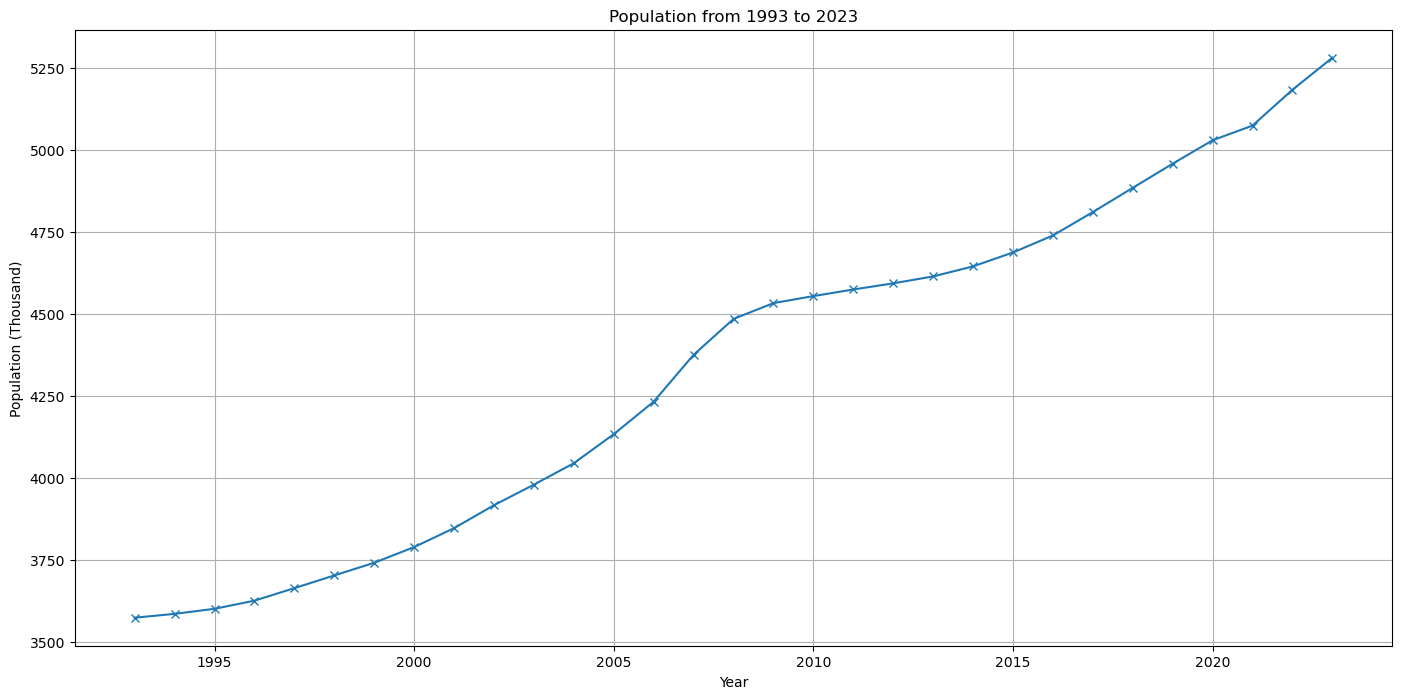

In [543]:
population_data = data[filtre]   #population_data is created .
values_population = population_data['VALUE'] #Only values are chosen .
years = population_data['Year'] #only years are chosen .

plt.figure(figsize=(17, 8))  #Dimentionals are adjusted .
plt.plot(years, values , marker='x') #years and values are displayed and used 'x' mark to understand crashed points .
plt.title("Population from 1993 to 2023") #title name is written .
plt.xlabel("Year") #X line is disagned 
plt.ylabel("Population (Thousand)") #Y line is disagned 
plt.grid(True) #I wanted to show grids also make my displaying clear 

plt.show() #I can show my displaying anymore . every 5 years are displayed if you wanna see every year you can add this command also : plt.xticks(years)

#Notice : Population values are thousand as you see below .

Make it clear and to show all years I wanted to add plt.xticks(years) command also below . It will be more specific 

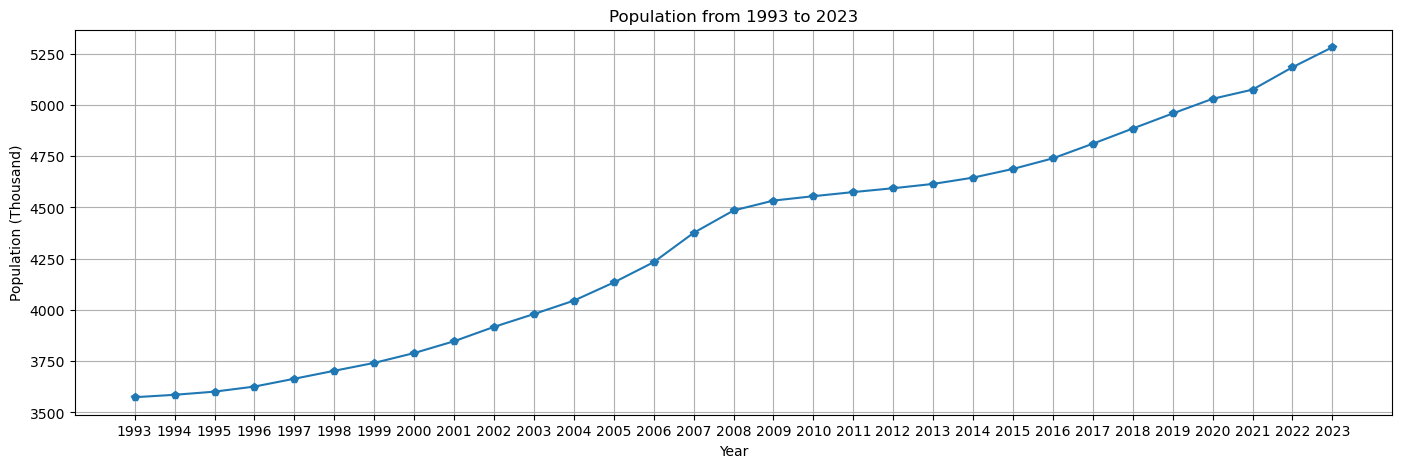

In [544]:
plt.figure(figsize=(17, 5)) #I have changed figsizes to show all years 
plt.plot(years, values , marker = 'p') #I have changed marker also make it crashed points handy
plt.title("Population from 1993 to 2023")
plt.xlabel("Year")
plt.ylabel("Population (Thousand)")
plt.grid(True)
plt.xticks(years) # added 

plt.show()

As you can see , strongly or slowly , there is something here apperantly , population are increases every year and there is huge difference between 30 years .

Let's see natural increases now below .

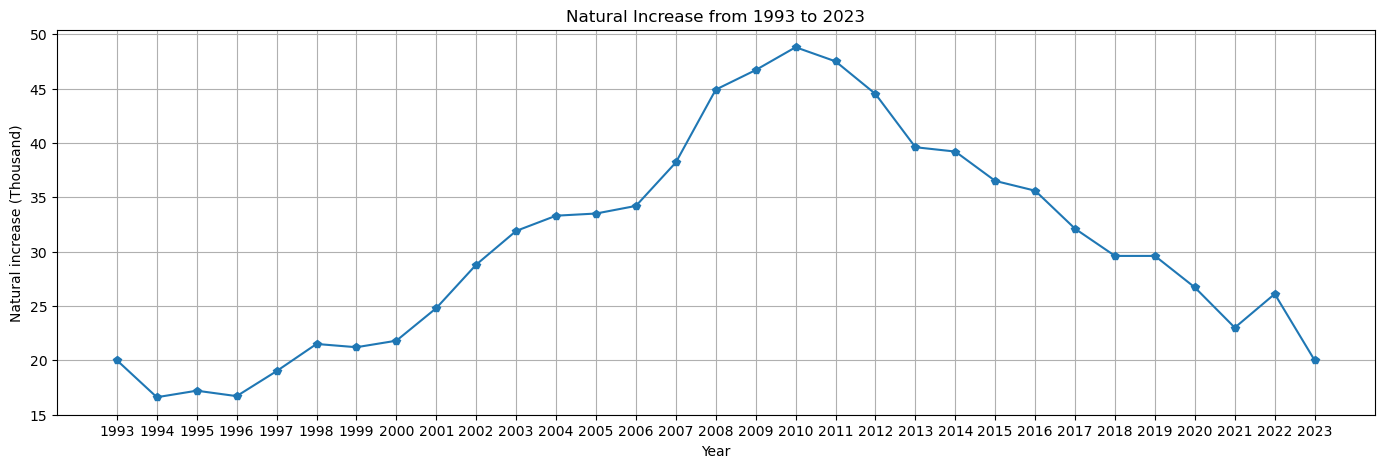

In [549]:
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == "Natural increase") #Natural İncreaes are selected .
natural_increase_data= data[filtre] #name is created 
values = natural_increase_data['VALUE']
years = natural_increase_data['Year']

plt.figure(figsize=(17, 5))
plt.plot(years, values , marker='p')
plt.title("Natural Increase from 1993 to 2023")
plt.xlabel("Year")
plt.ylabel("Natural increase (Thousand)")
plt.grid(True)
plt.xticks(years)

plt.show()

As we have seen , after 2010 natural increases going down . It's meaning still Annual births are bigger than Annual deaths but not strongly as before as than 2010 . Certainly , wme can say that natural increases support development of population .

We are having look net migration difference . It supports development of population or not , let's see together .

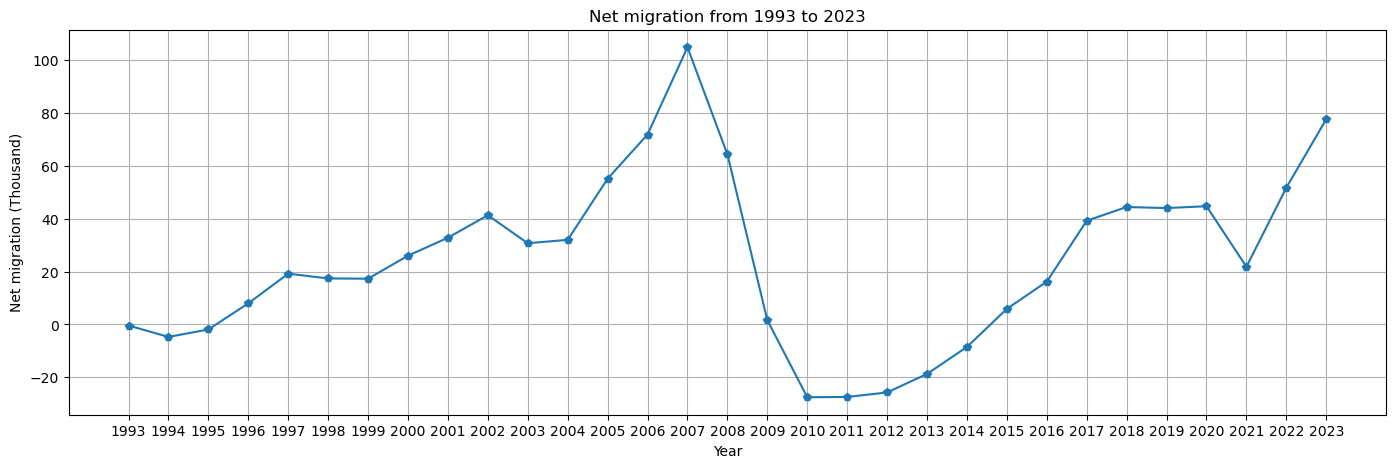

In [552]:
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == "Net migration") #Net migration is selected 
net_migration_data= data[filtre]
values = net_migration_data['VALUE']
years = net_migration_data['Year']

plt.figure(figsize=(17, 5))
plt.plot(years, values , marker='p')
plt.title("Net migration from 1993 to 2023")
plt.xlabel("Year")
plt.ylabel("Net migration (Thousand)")
plt.grid(True)
plt.xticks(years)

plt.show()

As we can see , every year net migration does not suppport development of population .( Minus values are showed between 2009-2015) What is that meaning ? Every year population is not fed by net migration . But this is obvious , after 2015 net migration supports development of population again .

Let's see how changed immigrations at last 30 years .

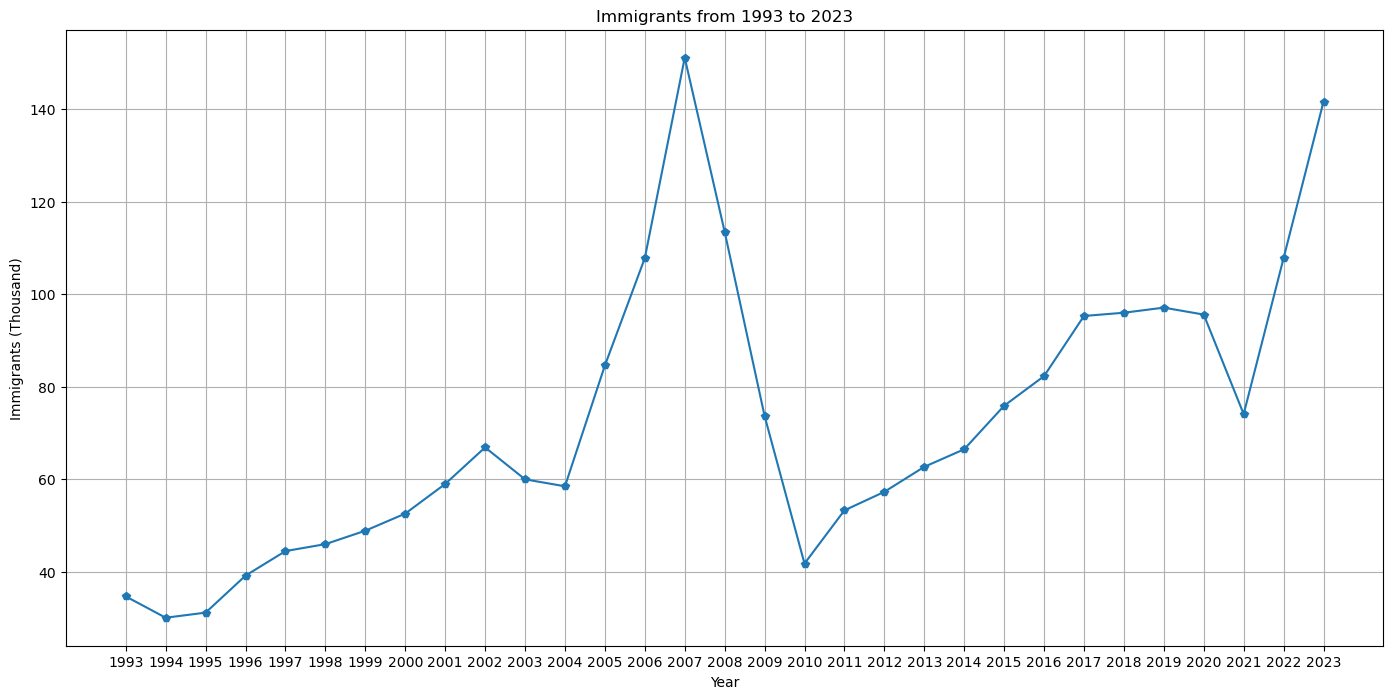

In [553]:
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == "Immigrants") #Immigrants are selected .
immigrants_data= data[filtre]
values = immigrants_data['VALUE']
years = immigrants_data['Year']

plt.figure(figsize=(17, 8))
plt.plot(years, values , marker='p')
plt.title("Immigrants from 1993 to 2023")
plt.xlabel("Year")
plt.ylabel("Immigrants (Thousand)")
plt.grid(True)
plt.xticks(years)

plt.show()

As we have seen , ın last 30 years , every year Ireland accepts immigrants. 2007 is max , 1994 is min . Last 2 years accepting immigrants are going up very strongly .

In [ ]:
What about emigrants ? 

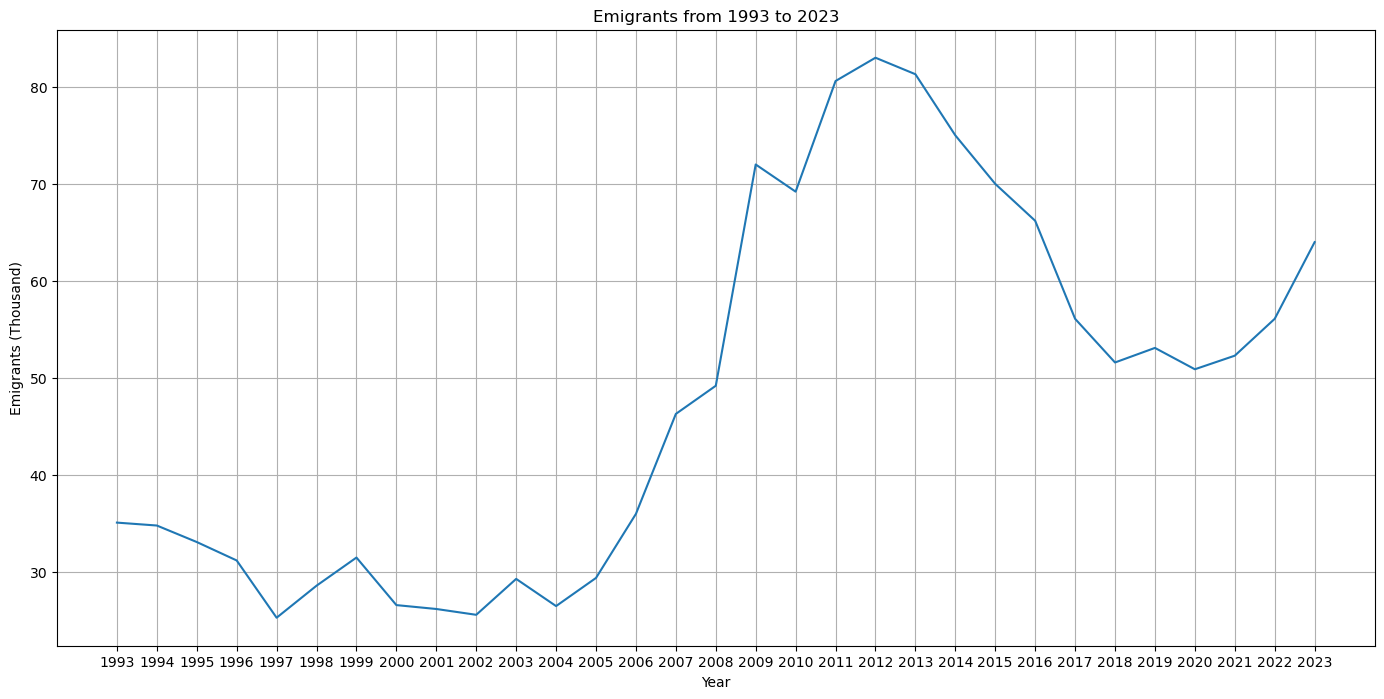

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("PEA15.20231021T091018.csv")
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == "Emigrants")
emigrants_data= data[filtre]
values = emigrants_data['VALUE']
years = emigrants_data['Year']

plt.figure(figsize=(17, 8))
plt.plot(years, values)
plt.title("Emigrants from 1993 to 2023")
plt.xlabel("Year")
plt.ylabel("Emigrants (Thousand)")
plt.grid(True)
plt.xticks(years)

plt.show()